First we will import the necessary libraries for this project and some utility functions I wrote for transforming the color space of images.

In [54]:
from utility_functions import convert_to_grayscale
import cv2
import numpy as np
from matplotlib import pyplot as plt

Part 1:
Before we use the canny edge detector, we will do some pre-processing.

Converting lab image to grayscale...


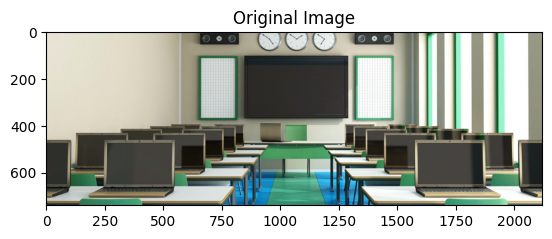

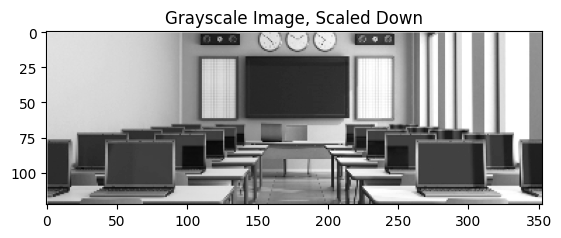

In [55]:
# read in the computer room image
lab_image = cv2.imread("Image_Input_2D/Computer Room.png")

# resize the input image to speed up processing
y_size = int(lab_image.shape[0] / 6)
x_size = int(lab_image.shape[1] / 6)
lab_image_scaled = cv2.resize(lab_image, (x_size, y_size), interpolation=cv2.INTER_NEAREST)

# convert the lab image to grayscale
print("Converting lab image to grayscale...")
lab_image_grayscale = convert_to_grayscale(lab_image_scaled)

plt.imshow(lab_image)
plt.title('Original Image')
plt.figure()
plt.title('Grayscale Image, Scaled Down')
plt.imshow(lab_image_grayscale, cmap="gray")

Now for the Edge detection part.
We will apply our own Gaussian blur + cv2.canny to get a good amount of
edges (rather than just leaving the blur to the canny edge detector)

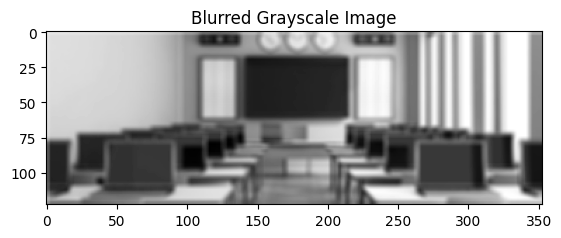

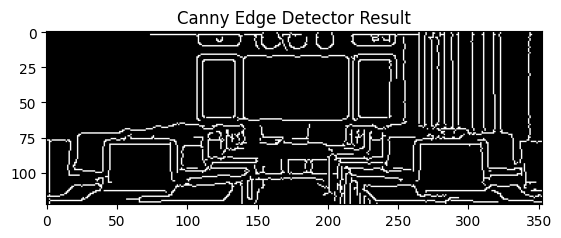

In [56]:
# 5x5 kernel for a flexible sigmaX blur cap
lab_blurred = cv2.GaussianBlur(lab_image_grayscale, (5, 5), sigmaX=2)
plt.title('Blurred Grayscale Image')
plt.imshow(lab_blurred, cmap="gray")

# Canny edge detector
edges_array = cv2.Canny(lab_blurred, threshold1=50, threshold2=150)

plt.figure()
plt.title('Canny Edge Detector Result')
plt.imshow(edges_array, cmap="gray")

Part 2:
The HoughLinesP function will return a 3d array of lines. Technically it acts more like a 2d array but its 3d for some reason (shape is (N, 1, 4)). Each line entry has a pair of coordinate values representing each line it found.
[x1, y1, x2, y2]

circles simply have a center, and a defined radius. HoughCircles will also return a weird shape (N, 1, 3).
[x, y, r]

Note that these are not complete shapes like squares or triangles. We would need to do extra steps to separate the image into shape definitions. This would be challenging to do with just Hough transform.

In [63]:
# use the Hough Transform to detect all lines/circles in the edge array
lines = cv2.HoughLinesP(edges_array, 1, np.pi / 180, threshold=50, minLineLength=20, maxLineGap=5)
circles = cv2.HoughCircles(edges_array, cv2.HOUGH_GRADIENT, dp=1, minDist=20, param1=100, param2=30, minRadius=5, maxRadius=50)

# print out the shape arrays requested by part 2
print("Line Array")
print(lines)
print("Circle Array")
print(circles)

Line Array
[[[218   2 293   2]]

 [[262  80 314  80]]

 [[ 82 120 126 120]]

 [[ 35 113  91 113]]

 [[270 113 312 113]]

 [[ 41  80  92  79]]

 [[201  97 225  97]]

 [[239  75 262  75]]

 [[211  62 245  60]]

 [[  0  77  22  77]]

 [[161 101 189 100]]

 [[268  76 294  76]]

 [[194 109 230 109]]

 [[110  16 135  16]]

 [[107  21 133  20]]

 [[136  17 182  17]]

 [[108 109 146 106]]

 [[223 119 276 120]]

 [[208  92 242  94]]

 [[311  77 311   0]]

 [[275  69 298  69]]

 [[323  71 323   0]]

 [[265  67 265   0]]

 [[311 102 341 102]]

 [[168  63 210  63]]

 [[189 101 250 104]]

 [[232   4 254   4]]

 [[201  90 231  90]]

 [[303  73 303   0]]

 [[114  97 154  97]]

 [[167  91 201  91]]

 [[221  10 245  10]]

 [[315 110 340 110]]

 [[ 46  76  67  76]]

 [[199 110 228 113]]

 [[325 119 346 120]]

 [[293  68 293   0]]

 [[167 104 189 104]]

 [[ 25  72  52  72]]

 [[310  97 340  97]]

 [[111  60 111  21]]

 [[283  75 283   0]]

 [[343  77 343   4]]

 [[279  75 279   6]]

 [[288   0 288  20]]


Part 3:
We will now be moving on from detecting basic shapes and use an algorithm to directly match an existing template object. That algorithm is SIFT.
kp = keypoints
d = descriptors

In [ ]:
# load template image and test image
pacman_img = cv2.imread()
game_img = cv2.imread()

pacman_kp, pacman_d = sift.detectAndCompute()